In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
df.shape

(568454, 10)

In [5]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df1 = df.iloc[:10000,:]

<Axes: xlabel='Score'>

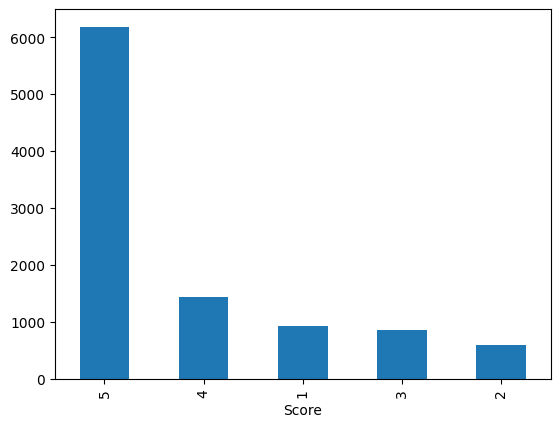

In [13]:
df1['Score'].value_counts().plot(kind='bar')

In [14]:
# Select the required columns for recommendation
ratings_df = df1[['Id', 'ProductId', 'Score']]
ratings_df

,Id,ProductId,Score
0,1,B001E4KFG0,5
1,2,B00813GRG4,1
2,3,B000LQOCH0,4
3,4,B000UA0QIQ,2
4,5,B006K2ZZ7K,5
...,...,...,...
9995,9996,B000P41A28,1
9996,9997,B000P41A28,5
9997,9998,B000P41A28,5
9998,9999,B000P41A28,5


In [15]:
pivot_table = ratings_df.pivot_table(index='Id', columns='ProductId', values='Score', fill_value=0)

In [16]:
pivot_table

ProductId,B00002NCJC,B00002Z754,B00005V3DC,B000084DVR,B000084E1U,B000084EK4,B000084EK5,B000084EK6,B000084EK7,B000084EK8,...,B0092XAMDQ,B0093NIWVO,B00959DMWK,B00961CUXO,B0096E5196,B009AVDFCK,B009D668KS,B009HINRX8,B009UOFU20,B009WSNWC4
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
items_similarity = cosine_similarity(pivot_table)


In [18]:
# Example: Get top-k recommendations for a given user
user_id = 4
k = 5

In [19]:
user_ratings = pivot_table.loc[user_id,:].values.reshape(1,-1)
user_ratings

array([[0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# Calculate the similarity between the user's ratings and all items
user_item_similarity = cosine_similarity(user_ratings,pivot_table)

In [21]:
# Get the indices of top-k similar items
similar_item_indices = user_item_similarity.flatten().argsort()[::-1]

In [22]:
similar_item_indices

array([   3, 3338, 3337, ..., 6661, 6660, 6669])

In [23]:
recommendations = ratings_df[ratings_df['Id'].isin(similar_item_indices)].head(k)
print(recommendations)

   Id   ProductId  Score
0   1  B001E4KFG0      5
1   2  B00813GRG4      1
2   3  B000LQOCH0      4
3   4  B000UA0QIQ      2
4   5  B006K2ZZ7K      5


## Drive Code with Recommendation

In [24]:
def recommend_items(ratings_df):
    # Filter recommendations based on minimum rating
    filtered_recommendations = ratings_df[ratings_df['Score'] >= 3].head(50)
    
    return filtered_recommendations


recommendations = recommend_items(ratings_df)

if not recommendations.empty:
    for index, row in recommendations.iterrows():
        print("Product ID:", row['ProductId'], "Score:", row['Score'])
else:
    print("No recommendations found.")

Product ID: B001E4KFG0 Score: 5
Product ID: B000LQOCH0 Score: 4
Product ID: B006K2ZZ7K Score: 5
Product ID: B006K2ZZ7K Score: 4
Product ID: B006K2ZZ7K Score: 5
Product ID: B006K2ZZ7K Score: 5
Product ID: B000E7L2R4 Score: 5
Product ID: B00171APVA Score: 5
Product ID: B0001PB9FE Score: 5
Product ID: B0009XLVG0 Score: 5
Product ID: B001GVISJM Score: 4
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 4
Product ID: B00144C10S Score: 5
Product ID: B0001PB9FY Score: 5
Product ID: B003F6UO7K Score: 5
Product ID: B003F6UO7K Score: 5
Product ID: B001EO5QW8 Score: 4
Product ID: B001EO5QW8 Score: 4
Product ID: B001EO5QW8 Score: 5
Product ID: B001EO5QW8 Score: 4
Product 

### Rating Based by KMeans

In [25]:
import pandas as pd
from sklearn.cluster import KMeans

In [26]:
# # Load the dataset
# # df = pd.read_csv('your_dataset.csv')

# # Select the required columns for recommendation
# ratings_df = df[['Id', 'ProductId', 'Score']]

# Create a pivot table to represent the user-item rating matrix
# pivot_table = ratings_df.pivot_table(index='Id', columns='ProductId', values='Score', fill_value=0)

# Apply k-means clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_table)

# Example: Get recommendations for a given user
user_id = 5

# Get the cluster label for the given user
user_cluster_label = cluster_labels[user_id - 1]


In [27]:
# Get all users in the same cluster as the given user
users_in_same_cluster = pivot_table.index[cluster_labels == user_cluster_label]

# Get the average ratings of the users in the same cluster
average_ratings = pivot_table.loc[users_in_same_cluster].mean()

# Sort the average ratings in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Example: Get top-k recommendations
k = 5
top_k_recommendations = sorted_ratings.head(k)

# Print the top-k recommendations
print("Top", k, "recommendations for user", user_id, ":")
for product_id, rating in top_k_recommendations.items():
    print("Product ID:", product_id, "Rating:", rating)

Top 5 recommendations for user 5 :
Product ID: B006N3IG4K Rating: 0.19050659855257557
Product ID: B001RVFDOO Rating: 0.14346530438484462
Product ID: B005K4Q1VI Rating: 0.13654746700723713
Product ID: B001LG945O Rating: 0.12941677309493402
Product ID: B004391DK0 Rating: 0.10632183908045977
